In [2]:
%pip install tensorflow
%pip install numpy
%pip install matplotlib

  Using cached ml_dtypes-0.2.0-cp311-cp311-win_amd64.whl.metadata (20 kB)
Using cached ml_dtypes-0.2.0-cp311-cp311-win_amd64.whl (938 kB)
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.3.2
    Uninstalling ml-dtypes-0.3.2:
      Successfully uninstalled ml-dtypes-0.3.2
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorstore 0.1.56 requires ml-dtypes>=0.3.1, but you have ml-dtypes 0.2.0 which is incompatible.
tf-nightly-intel 2.17.0.dev20240305 requires ml-dtypes~=0.3.1, but you have ml-dtypes 0.2.0 which is incompatible.


Note: you may need to restart the kernel to use updated packages.



In [7]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# TensorFlow from Scratch (Low-Level API)

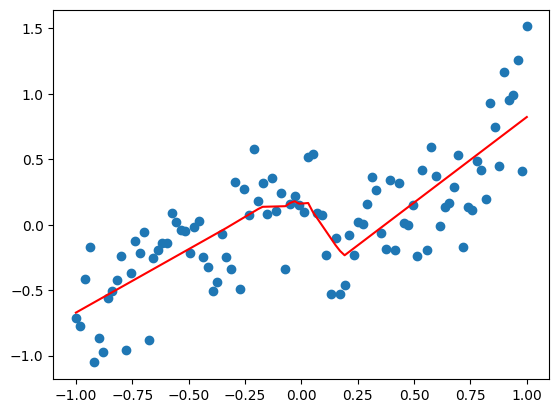

In [4]:
# Generate synthetic data
x = np.linspace(-1, 1, 100).reshape(-1, 1).astype(np.float32)
y = x**3 + np.random.normal(0, 0.3, size=x.shape).astype(np.float32)

# Define model parameters
W1 = tf.Variable(tf.random.normal([1, 10], dtype=tf.float32))
b1 = tf.Variable(tf.zeros([10], dtype=tf.float32))
W2 = tf.Variable(tf.random.normal([10, 10], dtype=tf.float32))
b2 = tf.Variable(tf.zeros([10], dtype=tf.float32))
W3 = tf.Variable(tf.random.normal([10, 1], dtype=tf.float32))
b3 = tf.Variable(tf.zeros([1], dtype=tf.float32))

# Model
def model(x):
    layer1 = tf.nn.relu(tf.matmul(x, W1) + b1)
    layer2 = tf.nn.relu(tf.matmul(layer1, W2) + b2)
    return tf.matmul(layer2, W3) + b3

# Loss
def compute_loss(y_true, y_pred):
    return tf.reduce_mean(tf.square(y_true - y_pred))

# Training
optimizer = tf.optimizers.Adam()
for i in range(1000):
    with tf.GradientTape() as tape:
        y_pred = model(x)
        loss = compute_loss(y, y_pred)
    gradients = tape.gradient(loss, [W1, b1, W2, b2, W3, b3])
    optimizer.apply_gradients(zip(gradients, [W1, b1, W2, b2, W3, b3]))

# Plot results
plt.scatter(x, y)
plt.plot(x, model(x), color='red')
plt.show()

# TensorFlow with Built-In Layers



Epoch 1/1000

4/4 [==============================] - 1s 2ms/step - loss: 0.2411
Epoch 2/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.2276
Epoch 3/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.2165
Epoch 4/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.2058
Epoch 5/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.1975
Epoch 6/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.1893
Epoch 7/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.1824
Epoch 8/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.1766
Epoch 9/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.1714
Epoch 10/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.1673
Epoch 11/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.1629
Epoch 12/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.1596
Epoch 13/1000
4/4 [===========================

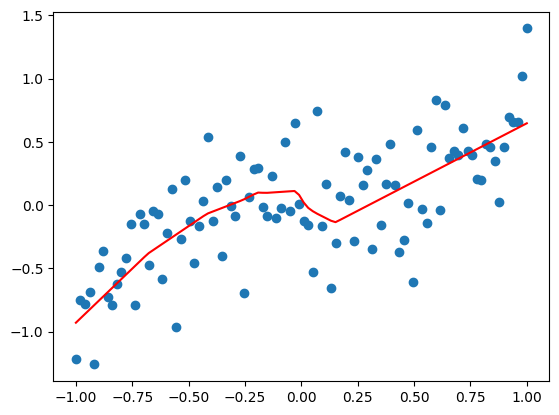

In [5]:
# Generate synthetic data
x = np.linspace(-1, 1, 100).reshape(-1, 1).astype(np.float32)
y = x**3 + np.random.normal(0, 0.3, size=x.shape).astype(np.float32)

# Model using built-in layers
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu', input_shape=(1,)),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1)
])

# Compile model
model.compile(optimizer='adam', loss='mse')

# Train model
model.fit(x, y, epochs=1000)

# Plot results
plt.scatter(x, y)
plt.plot(x, model.predict(x), color='red')
plt.show()

# TensorFlow Functional API (High-Level API)

Epoch 1/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.1385
Epoch 2/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.1346
Epoch 3/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.1314
Epoch 4/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.1286
Epoch 5/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.1257
Epoch 6/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.1233
Epoch 7/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.1217
Epoch 8/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.1193
Epoch 9/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.1182
Epoch 10/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.1166
Epoch 11/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.1158
Epoch 12/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.1150
Epoch 13/1000
4/4 [==============================

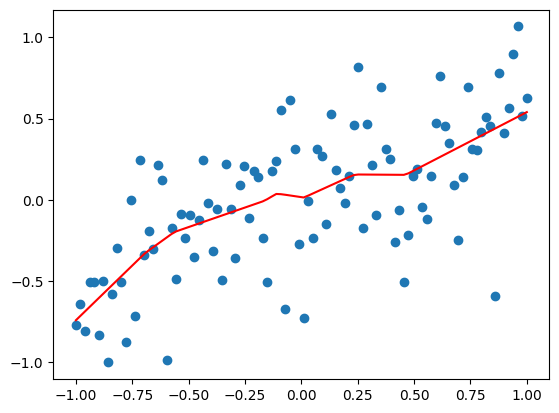

In [8]:
# Generate synthetic data
x_data = np.linspace(-1, 1, 100).reshape(-1, 1).astype(np.float32)
y_data = x_data**3 + np.random.normal(0, 0.3, size=x_data.shape).astype(np.float32)

# Define model using Functional API
inputs = tf.keras.Input(shape=(1,))
x = tf.keras.layers.Dense(10, activation='relu')(inputs)
x = tf.keras.layers.Dense(10, activation='relu')(x)
outputs = tf.keras.layers.Dense(1)(x)
model = tf.keras.Model(inputs=inputs, outputs=outputs)

# Compile model
model.compile(optimizer='adam', loss='mse')

# Train model
model.fit(x_data, y_data, epochs=1000)

# Plot results
plt.scatter(x_data, y_data)
plt.plot(x_data, model.predict(x_data), color='red')
plt.show()

# TensorFlow High-Level API with Model Subclassing

Epoch 1/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.2168
Epoch 2/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.2061
Epoch 3/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.1970
Epoch 4/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.1880
Epoch 5/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.1795
Epoch 6/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.1726
Epoch 7/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.1656
Epoch 8/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.1605
Epoch 9/1000
4/4 [==============================] - 0s 1000us/step - loss: 0.1561
Epoch 10/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.1516
Epoch 11/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.1480
Epoch 12/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.1456
Epoch 13/1000
4/4 [===========================

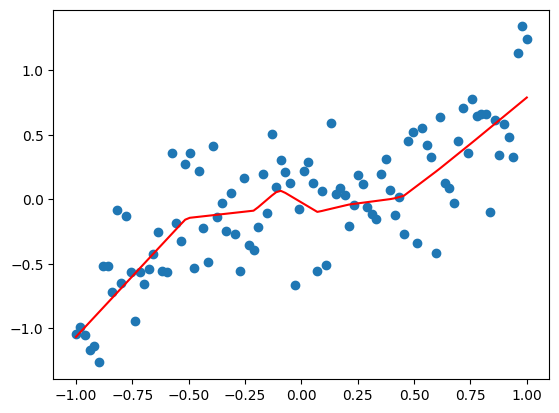

In [6]:
# Generate synthetic data
x = np.linspace(-1, 1, 100).reshape(-1, 1).astype(np.float32)
y = x**3 + np.random.normal(0, 0.3, size=x.shape).astype(np.float32)

# Define model by subclassing tf.keras.Model
class MyModel(tf.keras.Model):
    def __init__(self):
        super(MyModel, self).__init__()
        self.dense1 = tf.keras.layers.Dense(10, activation='relu')
        self.dense2 = tf.keras.layers.Dense(10, activation='relu')
        self.dense3 = tf.keras.layers.Dense(1)

    def call(self, inputs, training=None, mask=None):
        x = self.dense1(inputs)
        x = self.dense2(x)
        return self.dense3(x)

# Create an instance of the model
model = MyModel()

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(x, y, epochs=1000)

# Plot results
plt.scatter(x, y)
plt.plot(x, model.predict(x), color='red')
plt.show()